Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice
from copy import deepcopy

import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import numpy as np

import pickle
import os

from lab10 import *

c:\ProgramData\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
epsilon = 0.001
training_steps = 100_000

## Basic Problem

### Training

In [3]:
value_dictionary, hit_state = train_loop(0.001, 1)

100%|██████████| 1/1 [00:00<?, ?it/s]


In [4]:
path = os.path.join("value_dictionaries", f"value_dictionary_{epsilon}_{training_steps}.pkl")

# if file exists, load it
try:
    with open(path, 'rb') as f:
        value_dictionary = pickle.load(f)
except FileNotFoundError:
    value_dictionary, hit_state = train_loop(epsilon, training_steps)
    with open(path, "wb") as f:
        pickle.dump(value_dictionary, f)

In [5]:
res = play_game(agent_move, 
            random_move, 
            value_dictionary=value_dictionary,
            agent_player=1)

if res == "Player 1":
    print('Player 1 wins')
elif res == "Player 2":
    print('Player 2 wins')
else:
    print('Draw')

Player 1 wins


### Results

#### Random vs. Random

In [6]:
player1 = random_move
player2 = random_move
agent_player = -1

print('Random player(p1) vs random player(p2)')
print()

results = evaluate(player1, 
                player2,
                value_dictionary=value_dictionary, 
                agent_player=agent_player,
                games=10_000)
print_results(results)

Random player(p1) vs random player(p2)



100%|██████████| 10000/10000 [00:01<00:00, 8250.81it/s]

['Draw' 'Player 1' 'Player 2'] [0.125  0.5897 0.2853]


#### Agent vs. Random

In [7]:
player1 = agent_move
player2 = random_move
agent_player = 1

print('Agent(p1) vs random player(p2)')
print()

results = evaluate(player1, 
                player2,
                value_dictionary=value_dictionary, 
                agent_player=agent_player,
                games=10_000)
print_results(results)

Agent(p1) vs random player(p2)



100%|██████████| 10000/10000 [00:01<00:00, 7153.82it/s]

['Draw' 'Player 1' 'Player 2'] [0.0151 0.9849 0.    ]


#### Random vs. agent

In [8]:
player1 = random_move
player2 = agent_move
agent_player = 2

print('Random player(p1) vs agent(p2)')
print()

results = evaluate(player1, 
                player2, 
                value_dictionary=value_dictionary, 
                agent_player=agent_player,
                games=10_000)
print_results(results)

Random player(p1) vs agent(p2)



100%|██████████| 10000/10000 [00:01<00:00, 6460.41it/s]

['Draw' 'Player 1' 'Player 2'] [0.0105 0.9895 0.    ]


In [9]:
player1 = random_move
player2 = agent_move
agent_player = 2

print('Random player(p1) vs agent(p2)')
print()

results = evaluate(player1, 
                player2, 
                value_dictionary=value_dictionary, 
                agent_player=agent_player,
                games=10_000, 
                trick=True)
print_results(results)

Random player(p1) vs agent(p2)



100%|██████████| 10000/10000 [00:01<00:00, 6165.10it/s]

['Draw' 'Player 1' 'Player 2'] [0.4381 0.4895 0.0724]


## Generalisation of the problem also on O 

### Training

In [10]:
def complete_train_loop(epsilon, training_steps):
    value_dictionary_X = defaultdict(float)
    value_dictionary_O = defaultdict(float)
    hit_state = defaultdict(int)

    for steps in tqdm(range(training_steps)):
        trajectory = random_game()
        final_reward = state_value(trajectory[-1])
        for i, state in enumerate(trajectory):
            hashable_state = (frozenset(state.x), frozenset(state.o))
            hit_state[hashable_state] += 1

            # X
            if i % 2 == 0: # X turn
                value_dictionary_X[hashable_state] = value_dictionary_X[
                    hashable_state
                ] + epsilon * (final_reward - value_dictionary_X[hashable_state])

            # O
            else: # O turn
                value_dictionary_O[hashable_state] = value_dictionary_O[
                    hashable_state
                ] + epsilon * (-final_reward - value_dictionary_O[hashable_state])

    complete_value_dictionary = {"x": value_dictionary_X, "o": value_dictionary_O}
    return complete_value_dictionary, hit_state

In [11]:
epsilon = 0.001
training_steps = 100_001

path = os.path.join("value_dictionaries", f"complete_value_dictionary_{epsilon}_{training_steps}.pkl")

# if file exists, load it
try:
    with open(path, 'rb') as f:
        complete_value_dictionary = pickle.load(f)
except FileNotFoundError:
    complete_value_dictionary, complete_hit_state = complete_train_loop(epsilon, training_steps)
    with open(path, "wb") as f:
        pickle.dump(complete_value_dictionary, f)

### Results

In [12]:
player1 = complete_agent_move
player2 = random_move
agent_player = 1

print('Random player(p1) vs agent(p2)') if agent_player == 2 else print('Agent(p1) vs random player(p2)')
print()

results = complete_evaluate(player1, 
                        player2, 
                        complete_value_dictionary=complete_value_dictionary, 
                        agent_player=agent_player,
                        games=10_000)
print_results(results)

Agent(p1) vs random player(p2)



100%|██████████| 10000/10000 [00:01<00:00, 6819.99it/s]

['Draw' 'Player 1' 'Player 2'] [0.0085 0.9915 0.    ]


In [13]:
player1 = random_move
player2 = complete_agent_move
agent_player = 2

print('Random player(p1) vs agent(p2)') if agent_player == 2 else print('Agent(p1) vs random player(p2)')
print()

results = complete_evaluate(player1, 
                        player2, 
                        complete_value_dictionary=complete_value_dictionary, 
                        agent_player=agent_player,
                        games=10_000)
print_results(results)

Random player(p1) vs agent(p2)



100%|██████████| 10000/10000 [00:01<00:00, 6784.28it/s]

['Draw' 'Player 1' 'Player 2'] [0.0542 0.0342 0.9116]


## Hyperparameter tuning

### Parameters Grid

In [14]:
training_steps_list = [125, 250, 500, 1_000, 2_000, 3_000, 4_000, 5_000, 7_500, 10_000, 25_000, 50_000, 100_000, 250_000, 500_000, 1_000_000]
epsilon = 0.001

### Training Loops

In [15]:
for training_steps in training_steps_list: 
    path = os.path.join("value_dictionaries", f"complete_value_dictionary_{epsilon}_{training_steps}.pkl")
    try:
        with open(path, 'rb') as f:
            complete_value_dictionary = pickle.load(f)
    except FileNotFoundError:
        complete_value_dictionary, complete_hit_state = complete_train_loop(epsilon, training_steps)
        with open(path, "wb") as f:
            pickle.dump(complete_value_dictionary, f)

### Results

Agent vs. Random

In [16]:
# compare the different methods and see percentage of wins for each 

results = {}

for training_steps in training_steps_list: 
    path = os.path.join("value_dictionaries", f"complete_value_dictionary_{epsilon}_{training_steps}.pkl")
    with open(path, 'rb') as f:
        complete_value_dictionary = pickle.load(f)
        
    player1 = complete_agent_move
    player2 = random_move
    agent_player = 1
    result = complete_evaluate(player1, 
                            player2, 
                            complete_value_dictionary=complete_value_dictionary, 
                            agent_player=agent_player,
                            games=10_000)
    k, v = np.unique(result, return_counts=True)
    res = {key: value for key, value in zip(k, v)}
    results[training_steps] = res
        

100%|██████████| 10000/10000 [00:01<00:00, 7253.45it/s]


In [17]:
plt_results = defaultdict(dict)
for k in results.keys():
    plt_results[k]["Wins"] = results[k]["Player 1"] / 10_000 if "Player 1" in results[k] else 0
    plt_results[k]["Draws"] = results[k]["Draw"] / 10_000
    plt_results[k]["Losses"] = results[k]["Player 2"] / 10_000 if "Player 2" in results[k] else 0

for k in plt_results.keys():
    print(f"Training steps: {k}")
    print(f"Wins: {plt_results[k]['Wins']}, Draws: {plt_results[k]['Draws']}, Losses: {plt_results[k]['Losses']}")
    print()

Training steps: 125
Wins: 0.6982, Draws: 0.1211, Losses: 0.1807

Training steps: 250
Wins: 0.6566, Draws: 0.1414, Losses: 0.202

Training steps: 500
Wins: 0.7817, Draws: 0.098, Losses: 0.1203

Training steps: 1000
Wins: 0.7899, Draws: 0.069, Losses: 0.1411

Training steps: 2000
Wins: 0.837, Draws: 0.0791, Losses: 0.0839

Training steps: 3000
Wins: 0.9049, Draws: 0.0623, Losses: 0.0328

Training steps: 4000
Wins: 0.9351, Draws: 0.0307, Losses: 0.0342

Training steps: 5000
Wins: 0.8913, Draws: 0.0643, Losses: 0.0444

Training steps: 7500
Wins: 0.9441, Draws: 0.0383, Losses: 0.0176

Training steps: 10000
Wins: 0.968, Draws: 0.0173, Losses: 0.0147

Training steps: 25000
Wins: 0.977, Draws: 0.0168, Losses: 0.0062

Training steps: 50000
Wins: 0.9789, Draws: 0.0211, Losses: 0

Training steps: 100000
Wins: 0.9856, Draws: 0.0144, Losses: 0

Training steps: 250000
Wins: 0.9913, Draws: 0.0087, Losses: 0

Training steps: 500000
Wins: 0.9898, Draws: 0.0102, Losses: 0

Training steps: 1000000
Wins: 

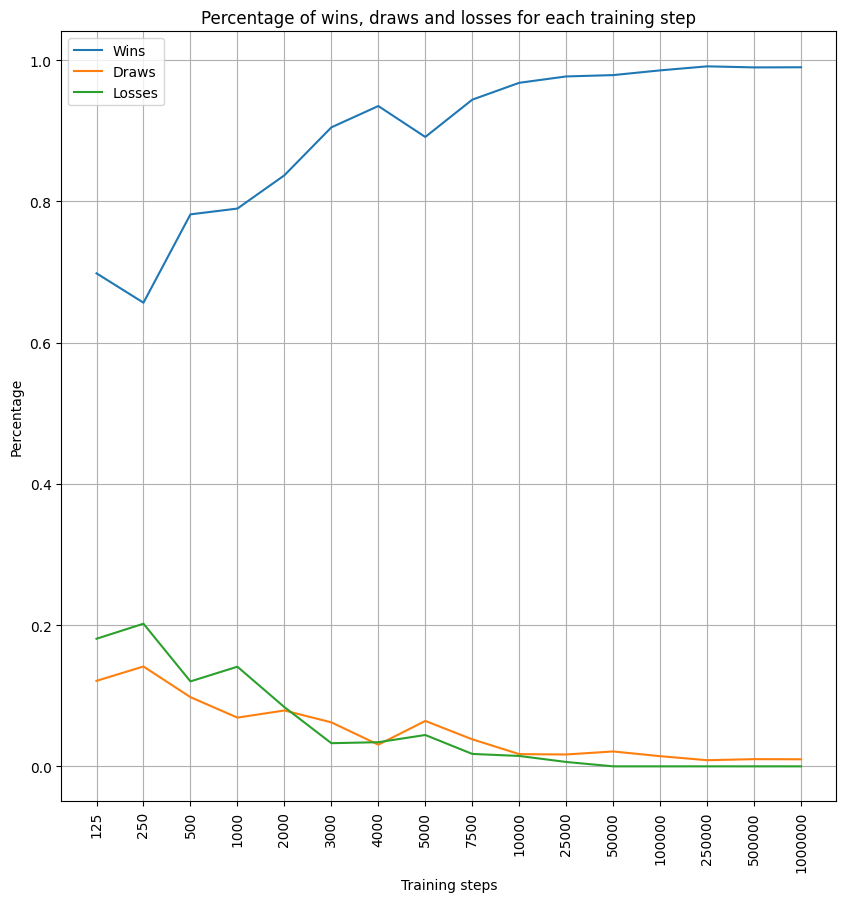

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Wins"] for k in plt_results.keys()], label="Wins")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Draws"] for k in plt_results.keys()], label="Draws")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Losses"] for k in plt_results.keys()], label="Losses")
ax.set_xlabel("Training steps")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of wins, draws and losses for each training step")
ax.legend()
ax.grid()
ax.set_xticks(np.arange(len(plt_results.keys())))
ax.set_xticklabels(training_steps_list, rotation=90)
plt.show()

Random vs. Agent

In [19]:
# compare the different methods and see percentage of wins for each 

results = {}

for training_steps in training_steps_list: 
    path = os.path.join("value_dictionaries", f"complete_value_dictionary_{epsilon}_{training_steps}.pkl")
    with open(path, 'rb') as f:
        complete_value_dictionary = pickle.load(f)
        
    player1 = random_move
    player2 = complete_agent_move
    agent_player = 2
    result = complete_evaluate(player1, 
                            player2, 
                            complete_value_dictionary=complete_value_dictionary, 
                            agent_player=agent_player,
                            games=10_000)
    k, v = np.unique(result, return_counts=True)
    res = {key: value for key, value in zip(k, v)}
    results[training_steps] = res        

100%|██████████| 10000/10000 [00:01<00:00, 6281.20it/s]


In [20]:
plt_results = defaultdict(dict)
for k in results.keys():
    plt_results[k]["Losses"] = results[k]["Player 1"] / 10_000 if "Player 1" in results[k] else 0
    plt_results[k]["Draws"] = results[k]["Draw"] / 10_000
    plt_results[k]["Wins"] = results[k]["Player 2"] / 10_000 if "Player 2" in results[k] else 0
    
for k in plt_results.keys():
    print(f"Training steps: {k}")
    print(f"Wins: {plt_results[k]['Wins']}, Draws: {plt_results[k]['Draws']}, Losses: {plt_results[k]['Losses']}")
    print()

Training steps: 125
Wins: 0.3262, Draws: 0.0855, Losses: 0.5883

Training steps: 250
Wins: 0.4729, Draws: 0.042, Losses: 0.4851

Training steps: 500
Wins: 0.5552, Draws: 0.0962, Losses: 0.3486

Training steps: 1000
Wins: 0.5783, Draws: 0.1049, Losses: 0.3168

Training steps: 2000
Wins: 0.7005, Draws: 0.1103, Losses: 0.1892

Training steps: 3000
Wins: 0.7675, Draws: 0.0656, Losses: 0.1669

Training steps: 4000
Wins: 0.7613, Draws: 0.0792, Losses: 0.1595

Training steps: 5000
Wins: 0.8358, Draws: 0.0681, Losses: 0.0961

Training steps: 7500
Wins: 0.8173, Draws: 0.0769, Losses: 0.1058

Training steps: 10000
Wins: 0.8461, Draws: 0.0575, Losses: 0.0964

Training steps: 25000
Wins: 0.894, Draws: 0.0703, Losses: 0.0357

Training steps: 50000
Wins: 0.8995, Draws: 0.0619, Losses: 0.0386

Training steps: 100000
Wins: 0.904, Draws: 0.0614, Losses: 0.0346

Training steps: 250000
Wins: 0.8996, Draws: 0.0565, Losses: 0.0439

Training steps: 500000
Wins: 0.9025, Draws: 0.0538, Losses: 0.0437

Trainin

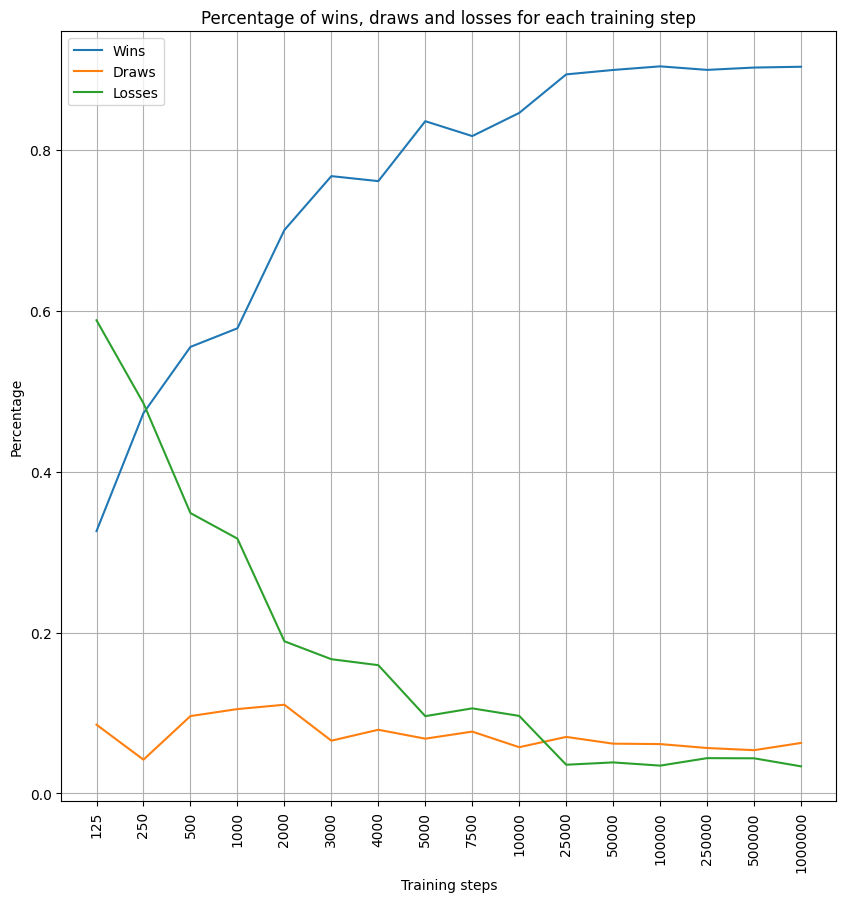

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Wins"] for k in plt_results.keys()], label="Wins")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Draws"] for k in plt_results.keys()], label="Draws")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Losses"] for k in plt_results.keys()], label="Losses")
ax.set_xlabel("Training steps")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of wins, draws and losses for each training step")
ax.legend()
ax.grid()
ax.set_xticks(np.arange(len(plt_results.keys())))
ax.set_xticklabels(training_steps_list, rotation=90)
plt.show()

## Multiple Trajectories

In [22]:
training_steps_list = [125, 250, 500, 1_000, 2_000, 3_000, 4_000, 5_000, 7_500, 10_000, 25_000, 50_000, 100_000, 250_000, 500_000, 1_000_000]
epsilon = 0.001

In [23]:
for training_steps in training_steps_list: 
    path = os.path.join("value_dictionaries", f"complete_mt_value_dictionary_{epsilon}_{training_steps}.pkl")
    try:
        with open(path, 'rb') as f:
            complete_value_dictionary = pickle.load(f)
    except FileNotFoundError:
        complete_value_dictionary, complete_hit_state = complete_mt_train_loop(epsilon, training_steps)
        with open(path, "wb") as f:
            pickle.dump(complete_value_dictionary, f)

Agent vs. random

In [24]:
# compare the different methods and see percentage of wins for each 

results = {}

for training_steps in training_steps_list: 
    path = os.path.join("value_dictionaries", f"complete_mt_value_dictionary_{epsilon}_{training_steps}.pkl")
    with open(path, 'rb') as f:
        complete_value_dictionary = pickle.load(f)
        
    player1 = complete_agent_move
    player2 = random_move
    agent_player = 1
    result = complete_evaluate(player1, 
                            player2, 
                            complete_value_dictionary=complete_value_dictionary, 
                            agent_player=agent_player,
                            games=10_000)
    k, v = np.unique(result, return_counts=True)
    res = {key: value for key, value in zip(k, v)}
    results[training_steps] = res
        

100%|██████████| 10000/10000 [00:01<00:00, 5814.70it/s]


In [25]:
plt_results = defaultdict(dict)
for k in results.keys():
    plt_results[k]["Wins"] = results[k]["Player 1"] / 10_000 if "Player 1" in results[k] else 0
    plt_results[k]["Draws"] = results[k]["Draw"] / 10_000
    plt_results[k]["Losses"] = results[k]["Player 2"] / 10_000 if "Player 2" in results[k] else 0

for k in plt_results.keys():
    print(f"Training steps: {k}")
    print(f"Wins: {plt_results[k]['Wins']}, Draws: {plt_results[k]['Draws']}, Losses: {plt_results[k]['Losses']}")
    print()

Training steps: 125
Wins: 0.7965, Draws: 0.1119, Losses: 0.0916

Training steps: 250
Wins: 0.7723, Draws: 0.0698, Losses: 0.1579

Training steps: 500
Wins: 0.8204, Draws: 0.092, Losses: 0.0876

Training steps: 1000
Wins: 0.9423, Draws: 0.011, Losses: 0.0467

Training steps: 2000
Wins: 0.9632, Draws: 0.0368, Losses: 0

Training steps: 3000
Wins: 0.9578, Draws: 0.0422, Losses: 0

Training steps: 4000
Wins: 0.9464, Draws: 0.0536, Losses: 0

Training steps: 5000
Wins: 0.978, Draws: 0.022, Losses: 0

Training steps: 7500
Wins: 0.9684, Draws: 0.0316, Losses: 0

Training steps: 10000
Wins: 0.978, Draws: 0.022, Losses: 0

Training steps: 25000
Wins: 0.9883, Draws: 0.0117, Losses: 0

Training steps: 50000
Wins: 0.9882, Draws: 0.0118, Losses: 0

Training steps: 100000
Wins: 0.99, Draws: 0.01, Losses: 0

Training steps: 250000
Wins: 0.991, Draws: 0.009, Losses: 0

Training steps: 500000
Wins: 0.989, Draws: 0.011, Losses: 0

Training steps: 1000000
Wins: 0.9894, Draws: 0.0106, Losses: 0



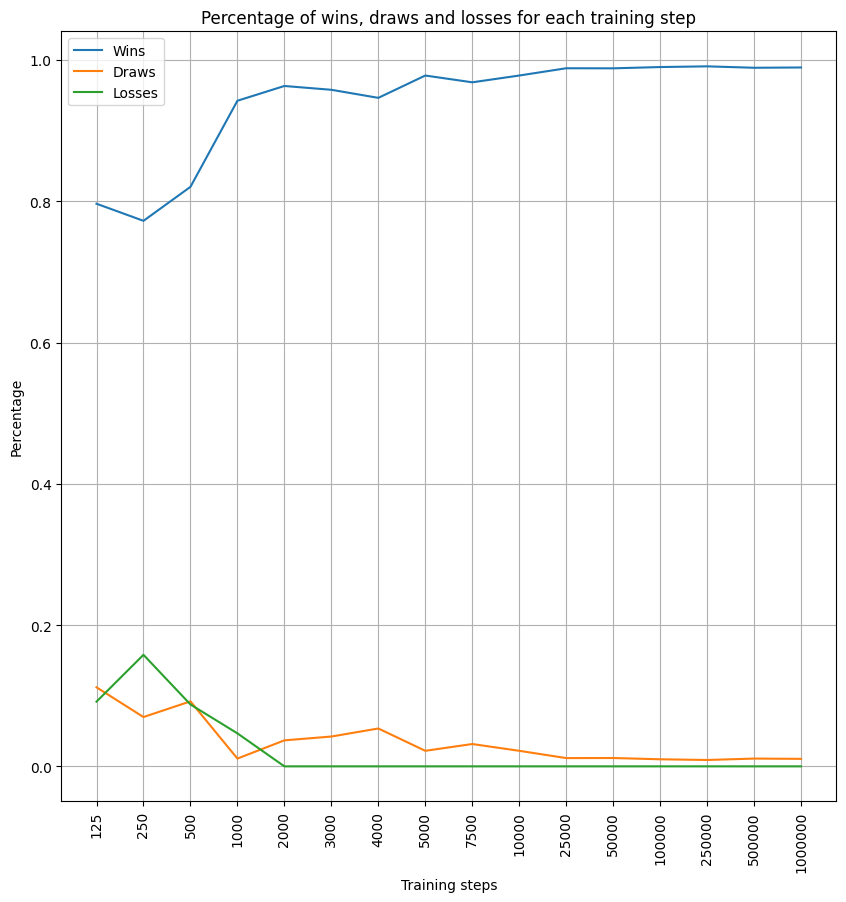

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Wins"] for k in plt_results.keys()], label="Wins")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Draws"] for k in plt_results.keys()], label="Draws")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Losses"] for k in plt_results.keys()], label="Losses")
ax.set_xlabel("Training steps")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of wins, draws and losses for each training step")
ax.legend()
ax.grid()
ax.set_xticks(np.arange(len(plt_results.keys())))
ax.set_xticklabels(training_steps_list, rotation=90)
plt.show()

Random vs. Agent

In [30]:
# compare the different methods and see percentage of wins for each 

results = {}

for training_steps in training_steps_list: 
    path = os.path.join("value_dictionaries", f"complete_mt_value_dictionary_{epsilon}_{training_steps}.pkl")
    with open(path, 'rb') as f:
        complete_value_dictionary = pickle.load(f)
        
    player1 = random_move
    player2 = complete_agent_move
    agent_player = 2
    result = complete_evaluate(player1, 
                            player2, 
                            complete_value_dictionary=complete_value_dictionary, 
                            agent_player=agent_player,
                            games=10_000)
    k, v = np.unique(result, return_counts=True)
    res = {key: value for key, value in zip(k, v)}
    results[training_steps] = res        

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:01<00:00, 6594.80it/s]


In [31]:
plt_results = defaultdict(dict)
for k in results.keys():
    plt_results[k]["Losses"] = results[k]["Player 1"] / 10_000 if "Player 1" in results[k] else 0
    plt_results[k]["Draws"] = results[k]["Draw"] / 10_000
    plt_results[k]["Wins"] = results[k]["Player 2"] / 10_000 if "Player 2" in results[k] else 0

for k in plt_results.keys():
    print(f"Training steps: {k}")
    print(f"Wins: {plt_results[k]['Wins']}, Draws: {plt_results[k]['Draws']}, Losses: {plt_results[k]['Losses']}")
    print()

Training steps: 125
Wins: 0.4564, Draws: 0.1043, Losses: 0.4393

Training steps: 250
Wins: 0.5718, Draws: 0.134, Losses: 0.2942

Training steps: 500
Wins: 0.6854, Draws: 0.1195, Losses: 0.1951

Training steps: 1000
Wins: 0.6903, Draws: 0.1295, Losses: 0.1802

Training steps: 2000
Wins: 0.9049, Draws: 0.0511, Losses: 0.044

Training steps: 3000
Wins: 0.8911, Draws: 0.0308, Losses: 0.0781

Training steps: 4000
Wins: 0.8852, Draws: 0.0811, Losses: 0.0337

Training steps: 5000
Wins: 0.9002, Draws: 0.0693, Losses: 0.0305

Training steps: 7500
Wins: 0.8889, Draws: 0.0847, Losses: 0.0264

Training steps: 10000
Wins: 0.8966, Draws: 0.0777, Losses: 0.0257

Training steps: 25000
Wins: 0.9001, Draws: 0.0704, Losses: 0.0295

Training steps: 50000
Wins: 0.8982, Draws: 0.0724, Losses: 0.0294

Training steps: 100000
Wins: 0.9008, Draws: 0.0605, Losses: 0.0387

Training steps: 250000
Wins: 0.8969, Draws: 0.0708, Losses: 0.0323

Training steps: 500000
Wins: 0.9023, Draws: 0.0559, Losses: 0.0418

Traini

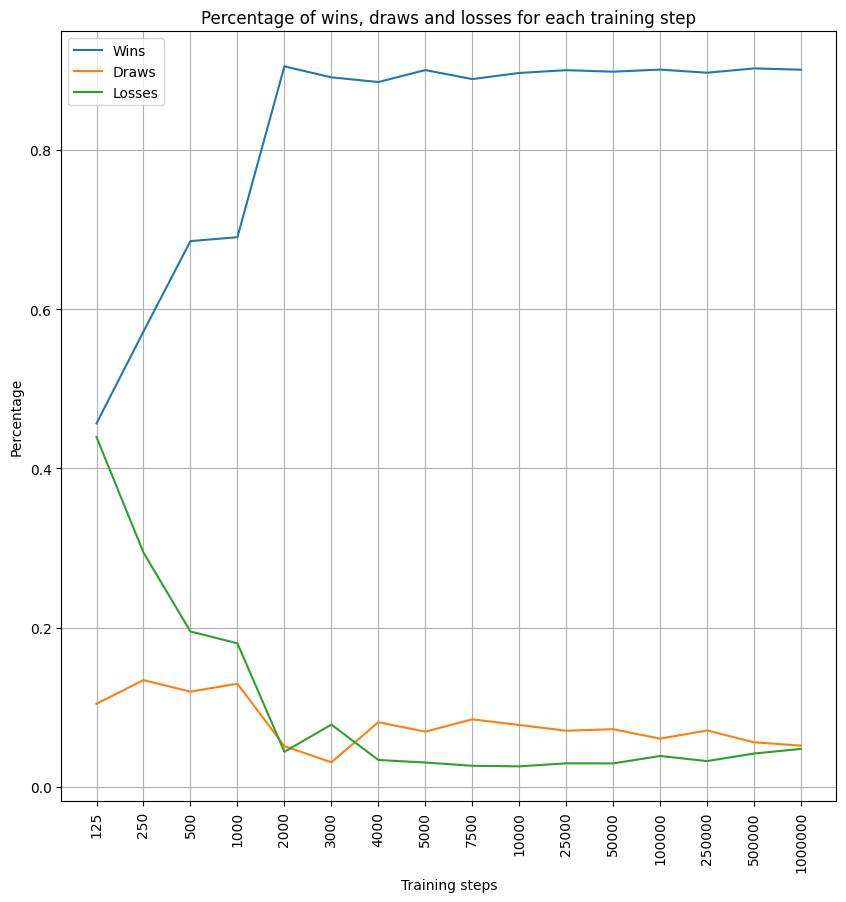

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Wins"] for k in plt_results.keys()], label="Wins")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Draws"] for k in plt_results.keys()], label="Draws")
ax.plot(np.arange(len(plt_results.keys())), [plt_results[k]["Losses"] for k in plt_results.keys()], label="Losses")
ax.set_xlabel("Training steps")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of wins, draws and losses for each training step")
ax.legend()
ax.grid()
ax.set_xticks(np.arange(len(plt_results.keys())))
ax.set_xticklabels(training_steps_list, rotation=90)
plt.show()

# Time evaluation 

In [33]:
from time import time

In [34]:
tic = time()
complete_value_dictionary, complete_hit_state = complete_train_loop(epsilon, 1)
toc = time()

print(f"Time taken: {toc - tic}")

100%|██████████| 1/1 [00:00<00:00, 997.93it/s]

Time taken: 0.004999399185180664


In [35]:
tic = time()
complete_value_dictionary, complete_hit_state = complete_mt_train_loop(epsilon, 1)
toc = time()

print(f"Time taken: {toc - tic}")

100%|██████████| 1/1 [00:00<?, ?it/s]

Time taken: 0.00400233268737793
